# This program is for Predicting the Loan Term (Problem 3)

Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online
application form.

The details filled by the customer are Gender, Marital Status, Education, Number of Dependents,
Income of self and co applicant, Required Loan Amount,Required Loan Term, Credit History and others.

The requirements are as follows:

1)Check eligibility of the Customer given the inputs described above.(Classification)

   If customer is not eligible for the input required amount and duration:

2) what can be amount for the given duration.(Regression)

3) if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration?
   What is that duration?(Regression)

# Approch for the Solution
we will split, the training data set for Loan Status YES and NO.

Loan Status Yes, data will be used for training the model and

Loan Ststus NO, data will be used to check the predicition of trained model.

Fianlly same will be done for the testing data set.

Loan status NO, from the testing data set will be used final predictoion.

# Import Libraries 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Read training and testing dataset

In [3]:
tr_A=pd.read_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/08_project_Loan prediction/training_set.csv")
tr_A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
ts_A=pd.read_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/08_project_Loan prediction/Predicted_loan_status_testing_set.csv")
ts_A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


# Create a Dataframe of all customers with Loan status as NO. and loan term less than 360 months (Testing dataset) 
This dataframe will be used for prediction 

In [5]:
ts_A1 = ts_A[(ts_A["Loan_Status"]=="N") & (ts_A["Loan_Amount_Term"]<360)]
ts_A1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
84,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.0,Semiurban,N
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban,N
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban,N
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban,N


# check dataframe profile

In [6]:
tr_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# check missing data in dataframe

In [7]:
tr_A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
ts_A.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

# cheking the column profile for uniquness of values

In [9]:
tr_A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# dropping the discrete column, Loan_ID

In [10]:
tr_B=tr_A.drop(labels=["Loan_ID"],axis=1)
ts_B=ts_A1.drop(labels=["Loan_ID"],axis=1)

# creating list of catagorical and continious columns

values less than 10 are considered as Catagorical columns and

values greater than 10 are considered Continuous columns

In [11]:
cat = []
con = []
for i in tr_B.columns:
    if (tr_B[i].nunique()<10):
        cat.append(i)
    else:
        con.append(i)
#cat.remove("Loan_Status")
#con.remove("LoanAmount")
cat,con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Credit_History',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

# Missing data treatment

fill missing data of catagorical coulmns by mode values of respective column

fill missing data of continuous columns by mean values of the respective columns

In [12]:
for i in cat:
    x=tr_B[i].mode()[0]
    tr_B[i]=tr_B[i].fillna(x)
    ts_B[i]=ts_B[i].fillna(x)

In [13]:
for i in con:
    x=tr_B[i].mean()
    tr_B[i]=tr_B[i].fillna(x)
    ts_B[i]=ts_B[i].fillna(x)   

In [14]:
tr_B.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
ts_B.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Check the ouliers in the data

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x1=pd.DataFrame(ss.fit_transform(tr_B[con]),columns=con)
x1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072651,-0.554368,0.000000,0.279851
1,0.000000,-0.038610,-0.219273,0.279851
2,-0.394096,-0.554368,-0.957641,0.279851
3,-0.462412,0.252103,-0.314547,0.279851
4,0.097389,-0.554368,-0.064454,0.279851


In [17]:
out = []
for i in con:
     out=out+list(x1[(x1[i]>3)|(x1[i]<-3)].index)

In [18]:
out=list(np.unique(out))
out

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

# Drop all outliers from the data

In [19]:
tr_C=tr_B.drop(index=out,axis=0)

# Reindexing the dataframe after deleting outliers

In [20]:
tr_C.index=range(0,tr_C.shape[0],1)

# check the distribution of continuous columns
plot histograms or disturibution plot

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

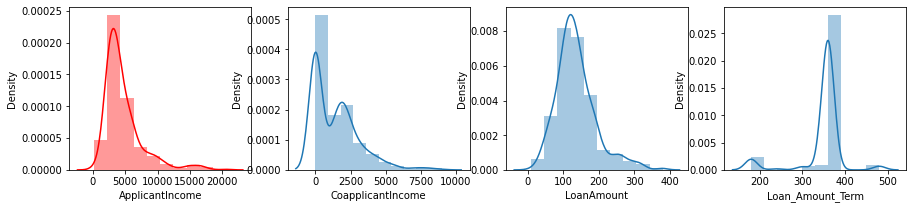

In [21]:
plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
sb.distplot(tr_C["ApplicantIncome"],bins=10,color="red")
plt.subplot(1,4,2)
sb.distplot(tr_C["CoapplicantIncome"],bins=10)
plt.subplot(1,4,3)
sb.distplot(tr_C["LoanAmount"],bins=10)
plt.subplot(1,4,4)
sb.distplot(tr_C["Loan_Amount_Term"],bins=10)

#From the plots it is observed that all columns show approximately normal distribution but skewed slightly towards right side

# Check the skewness of all continuous columns

In [22]:
for i in con:
    print(i,tr_C[i].skew())

ApplicantIncome 2.145688077185856
CoapplicantIncome 1.351358890837548
LoanAmount 1.1131318857924217
Loan_Amount_Term -2.077031480435139


In [23]:
for i in con:
    print(i,ts_B[i].skew())

ApplicantIncome 0.912724327058452
CoapplicantIncome -0.48637770379780143
LoanAmount -1.4235734689908974
Loan_Amount_Term -2.236067977499789


# Removing the skewness
To remove skewness, take the log trasnformation of all continous columns.
in Coapplican income column there are some values which are zero. Log of zero is not possible so before taking log replace zero values with small number 1 or 0.1 

In [24]:
tr_D=tr_C # copy the dataframe for the transformation
ts_D=ts_B

In [25]:
for i in con:
    if i!="Loan_Amount_Term":
        tr_D[i]=tr_D[i].replace({0:0.1})
        ts_D[i]=ts_D[i].replace({0:0.1})  

In [26]:
for i in con:
     if i!="Loan_Amount_Term":
        tr_D[i]=np.log(tr_D[i])
        ts_D[i]=np.log(ts_D[i])

In [27]:
for i in con:
    print(i,tr_D[i].skew())

ApplicantIncome -0.20969781631644963
CoapplicantIncome -0.23178696438172722
LoanAmount -0.7406162296042765
Loan_Amount_Term -2.077031480435139


# checking the relation between dependent and independent variables

# catagorical to continiuos relation - Annova test

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
col_to_drop = []

for i in cat:
    rel = "Loan_Amount_Term" +" ~ "+ i
    model=ols(rel,tr_D).fit()
    Q=anova_lm(model)
    pval=Q.iloc[0:1,4][0]
    if pval>0.05:
        col_to_drop.append(i)
    print("Loan_Amount_Term v/s ",i,"--->",pval)

Loan_Amount_Term v/s  Gender ---> 0.01209093957096434
Loan_Amount_Term v/s  Married ---> 0.002188247129602816
Loan_Amount_Term v/s  Dependents ---> 0.024728061095176817
Loan_Amount_Term v/s  Education ---> 0.02301243308287004
Loan_Amount_Term v/s  Self_Employed ---> 0.42401345373274857
Loan_Amount_Term v/s  Credit_History ---> 0.41460011103687755
Loan_Amount_Term v/s  Property_Area ---> 0.04553768352242231
Loan_Amount_Term v/s  Loan_Status ---> 0.6636212713375147


In [29]:
tr_D.corr()[["Loan_Amount_Term"]].sort_values

<bound method DataFrame.sort_values of                    Loan_Amount_Term
ApplicantIncome           -0.069203
CoapplicantIncome          0.005466
LoanAmount                 0.052361
Loan_Amount_Term           1.000000
Credit_History             0.034027>

In [30]:
tr_D.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,-2.302585,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.595180,7.318540,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,-2.302585,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,-2.302585,4.948760,360.0,1.0,Urban,Y


In [31]:
tr_E_yes= tr_D[tr_D["Loan_Status"]=="Y"]
tr_E_no = tr_D[(tr_D["Loan_Status"]=="N")&(tr_D["Loan_Amount_Term"]<360)]

tr_E_yes.index=range(0,tr_E_yes.shape[0],1)
tr_E_no.index=range(0,tr_E_no.shape[0],1)

ts_E=ts_D
ts_E.index=range(0,ts_E.shape[0],1)

In [32]:
tr_E_yes.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,-2.302585,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,0,Graduate,Yes,8.006368,-2.302585,4.189655,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,8.699515,-2.302585,4.948760,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,8.597297,8.341887,5.587249,360.0,1.0,Urban,Y


In [33]:
ts_E

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,8.402007,-2.302585,4.875197,180.0,0.0,Semiurban,N
1,Male,No,0,Graduate,No,8.012018,7.953318,5.068904,180.0,0.0,Urban,N
2,Male,Yes,0,Graduate,No,8.066521,8.053569,5.010635,180.0,0.0,Semiurban,N
3,Male,No,0,Graduate,No,7.963808,7.789869,4.553877,6.0,0.0,Semiurban,N
4,Male,Yes,3+,Not Graduate,No,8.578476,5.231109,5.062595,180.0,0.0,Semiurban,N


# Declare dependent 'Y' and independent 'X' variables 

In [34]:
Y=tr_E_yes[["Loan_Amount_Term"]]
X=tr_E_yes.drop(labels=["Loan_Amount_Term","Loan_Status"],axis=1)
X_no=tr_E_no.drop(labels=["Loan_Amount_Term","Loan_Status"],axis=1)
X_ts = ts_E.drop(labels=["Loan_Amount_Term"],axis=1)

In [35]:
cat.remove("Loan_Status")

In [36]:
con.remove("Loan_Amount_Term")

In [37]:
cat, con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Credit_History',
  'Property_Area'],
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

# Standradize the data
create one hot encoding for the catagorical columns

scale the continuous valeus in the range of 0 to 1

In [38]:
X1=pd.get_dummies(X[cat],columns=cat)
X1_ts=pd.get_dummies(X_ts[cat],columns=cat)
X1_no=pd.get_dummies(X_no[cat],columns=cat)

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X2= pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2_ts= pd.DataFrame(mm.transform(X_ts[con]),columns=con)
X2_no= pd.DataFrame(mm.transform(X_no[con]),columns=con)

# create new data frame combining both catagoriacal one hot encoded dataframe and scaled continous columns dataframe

In [40]:
Xnew =X1.join(X2)
Xnew_no =X1_no.join(X2_no)

In [41]:
Xnew_ts=X1_ts.join(X2_ts)

In [42]:
Xnew

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0.745922,0.000000,0.644400
1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0.596227,0.000000,0.347327
2,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0.562672,0.882758,0.570228
3,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0.751636,0.000000,0.630357
4,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0.728719,0.933288,0.868414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0.612928,0.866100,0.530945
394,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0.588626,0.000000,0.374555
395,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0.666592,0.000000,0.160616
396,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0.818146,0.682419,0.848333


# Divide this dataset into training and testing dataset
using test size = 0.2
    randam state as 42

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=42)

#As this is Regression problem , we will check with differnt regrssion techniques.

whichever model gives best results will be used for final traing

we will try following classifiers
1) Linear regession

2) Decision Tree

3) k-nearest neighbour

4) Random forest

5) Adaboost regressor

# Feature section using backward ellimination method

In [44]:
from statsmodels.api import add_constant,OLS

In [45]:
x_const=add_constant(xtrain)
ols=OLS(ytrain,x_const).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Loan_Amount_Term   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.413
Date:                Fri, 17 Mar 2023   Prob (F-statistic):              0.152
Time:                        22:58:51   Log-Likelihood:                -1675.5
No. Observations:                 318   AIC:                             3379.
Df Residuals:                     304   BIC:                             3432.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      85.8900      5.565     15.434      0.000      74.939      96.841
Gender_Female              44.2324      4.894      9.039      0.000      34.603      53.862
Gender_Male                41.6576      4.992      8.345      0.000      31.834      51.481
Married_No                 47.6593      4.247     11.222      0.000      39.302      56.016
Married_Yes                38.2307      4.705      8.126      0.000      28.972      47.489
Dependents_0               22.4556      4.550      4.935      0.000      13.502      31.409
Dependents_1               16.0798      6.308      2.549      0.011       3.666      28.493
Dependents_2               19.6964      5.952      3.309      0.001       7.984      31.408
Dependents_3+              27.6582      7.880      3.510      0.001      12.152      43.164
Education_Graduate         47.4340      4.533     10.464      0.000      38.514      56.354
Education_Not Graduate     38.4560      4.178      9.205      0.000      30.235      46.677
Self_Employed_No           41.2323      4.120     10.007      0.000      33.124      49.340
Self_Employed_Yes          44.6577      5.777      7.730      0.000      33.289      56.027
Credit_History_0.0         30.8822     11.481      2.690      0.008       8.289      53.475
Credit_History_1.0         55.0078      9.115      6.035      0.000      37.071      72.944
Property_Area_Rural        31.5122      4.704      6.699      0.000      22.256      40.768
Property_Area_Semiurban    33.2677      4.028      8.260      0.000      25.342      41.193
Property_Area_Urban        21.1100      4.404      4.794      0.000      12.444      29.776
ApplicantIncome           -58.6083     29.203     -2.007      0.046    -116.073      -1.143
CoapplicantIncome           2.2066      7.881      0.280      0.780     -13.302      17.716
LoanAmount                 40.6040     20.957      1.937      0.054      -0.636      81.844
==============================================================================
Omnibus:                      177.023   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.960
Skew:                          -2.411   Prob(JB):                    3.09e-197
Kurtosis:                       9.712   Cond. No.                     5.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# As adjusted R square score is very low 0.01, this is not good model for linear regression

# Function for calculating mean_squared_error of the model

In [46]:
def error(obj):
    
    model = obj.fit(xtrain,ytrain)
    
    tr_pred = model.predict(xtrain)
    ts_pred= model.predict(xtest)
    
    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain, tr_pred)
    ts_err = mean_squared_error(ytest, ts_pred)
    ge= tr_err-ts_err
    
    return tr_err,ts_err,ge

# K-Nearest neighbour

In [47]:
from sklearn.neighbors import KNeighborsRegressor


In [48]:
for i in range(2,12,1):
    knr = KNeighborsRegressor(n_neighbors=i,n_jobs=500)
    print(i,error(knr))

2 (1042.5566037735848, 3662.1, -2619.543396226415)
3 (1565.874213836478, 2952.3, -1386.4257861635222)
4 (1743.367924528302, 2831.00625, -1087.638325471698)
5 (1837.897358490566, 2780.5860000000002, -942.6886415094343)
6 (1885.8364779874214, 2494.0625, -608.2260220125786)
7 (1968.612244897959, 2495.2224489795917, -526.6102040816327)
8 (2015.0748820754718, 2565.52734375, -550.4524616745282)
9 (2056.2208245981833, 2577.7611111111114, -521.5402865129281)
10 (2109.592075471698, 2536.9559999999997, -427.3639245283016)
11 (2135.3993450803055, 2546.6838842975203, -411.28453921721484)


# Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr_1 = DecisionTreeRegressor(random_state=42)

In [50]:
error(dtr_1)

(0.0, 5286.15, -5286.15)

# Tuning the decision tree model for best parameters

In [51]:
for i in range(2,20,1):
    dtr_3=DecisionTreeRegressor(max_depth=i,random_state=42)
    print(i,error(dtr_3))

2 (2080.946949277138, 3301.5735089180293, -1220.6265596408912)
3 (1907.5787530963328, 4254.7767287522765, -2347.197975655944)
4 (1836.4852216304052, 4260.064613344474, -2423.579391714069)
5 (1683.2551196016432, 4240.610497850492, -2557.355378248849)
6 (1404.9678640458546, 4474.992727274497, -3070.0248632286425)
7 (1021.5122198679358, 4782.435345221111, -3760.9231253531752)
8 (782.3035966130307, 4710.0096283165085, -3927.706031703478)
9 (363.83796863513845, 4461.92296850623, -4098.084999871092)
10 (298.78204793786045, 5028.064790874727, -4729.282742936866)
11 (191.44493646515207, 4990.91563103915, -4799.470694573998)
12 (61.33267130089374, 5251.916914819945, -5190.584243519052)
13 (51.13251942286349, 4990.725217993079, -4939.592698570215)
14 (36.735849056603776, 4965.3, -4928.564150943396)
15 (0.0, 5286.15, -5286.15)
16 (0.0, 5286.15, -5286.15)
17 (0.0, 5286.15, -5286.15)
18 (0.0, 5286.15, -5286.15)
19 (0.0, 5286.15, -5286.15)


In [52]:
for i in range(2,10):
    dtr_4=DecisionTreeRegressor(min_samples_split=i,random_state=42)
    print(i,error(dtr_4))

2 (0.0, 5286.15, -5286.15)
3 (26.433962264150942, 4928.175, -4901.741037735849)
4 (125.39622641509433, 5711.075, -5585.678773584906)
5 (461.89622641509436, 4344.425, -3882.528773584906)
6 (468.4509433962264, 4465.367, -3996.9160566037735)
7 (664.6773584905659, 3387.8669999999997, -2723.189641509434)
8 (786.8444743935311, 3441.977204081633, -2655.132729688102)
9 (998.4812668463612, 3469.820954081633, -2471.3396872352714)


In [53]:
for i in range(2,20):
    dtr_5=DecisionTreeRegressor(max_leaf_nodes=i,random_state=42)
    print(i,error(dtr_5))

2 (2254.4611756168365, 2735.5465144230775, -481.085338806241)
3 (2160.1215529753267, 2991.7965144230775, -831.6749614477508)
4 (2080.946949277138, 3301.5735089180293, -1220.6265596408912)
5 (1979.060156824308, 4212.823508918029, -2233.7633520937206)
6 (1918.899507813314, 4221.0267287522765, -2302.1272209389626)
7 (1874.472431369042, 4188.920763134252, -2314.4483317652102)
8 (1787.095044590733, 4202.294366802807, -2415.1993222120745)
9 (1722.903042950044, 4195.597141850066, -2472.694098900022)
10 (1654.1973825726855, 4208.755141850066, -2554.5577592773807)
11 (1590.6737976670252, 4208.755141850066, -2618.081344183041)
12 (1519.2681372896668, 4208.755141850066, -2689.4870045603993)
13 (1475.1004637140556, 4317.255712113843, -2842.1552483997875)
14 (1414.4535634445137, 4667.383263134251, -3252.9296996897374)
15 (1387.787108422858, 4704.777113344475, -3316.9900049216167)
16 (1361.5148712260927, 4811.564868446515, -3450.0499972204225)
17 (1300.8679709565508, 4789.753643956719, -3488.8856730

# Randoam forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,random_state=42)

In [55]:
for i in range(2,10,1):
    rfr=RandomForestRegressor(n_estimators=200,random_state=42,max_depth=i)
    print(i,error(rfr))

2 (2014.0080402564329, 2674.368659150506, -660.3606188940732)
3 (1811.2901585302807, 2739.1538002413477, -927.863641711067)
4 (1588.4627854299338, 2774.589577229041, -1186.1267917991072)
5 (1333.5975837123246, 2840.856150179813, -1507.2585664674884)
6 (1053.637781673738, 2928.9639980290603, -1875.3262163553225)
7 (822.0174927905939, 2976.728874250646, -2154.7113814600525)
8 (645.1791366807573, 3069.571742975915, -2424.3926062951577)
9 (512.641318450236, 3106.8474871680396, -2594.206168717804)


In [56]:
for i in range(2,10,1):
    rfr=RandomForestRegressor(n_estimators=200,random_state=42,max_leaf_nodes=i)
    print(i,error(rfr))

2 (2200.117413392547, 2652.5120512957355, -452.3946379031886)
3 (2077.303313599495, 2667.25027078548, -589.946957185985)
4 (1973.288464789661, 2659.2222101411544, -685.9337453514934)
5 (1874.3723624255845, 2685.307032830785, -810.9346704052004)
6 (1774.3992282095203, 2710.132830114885, -935.7336019053648)
7 (1676.2506319329307, 2740.7437476079963, -1064.4931156750656)
8 (1588.4465229016455, 2757.3401025396474, -1168.893579638002)
9 (1498.3688591596313, 2774.2923434596837, -1275.9234843000525)


# Adaboost Regressor

In [57]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2,random_state=42),n_estimators=500,random_state=42)

In [58]:
error(abr)

(2324.1509054489384, 2847.263993215117, -523.1130877661785)

In [59]:
abr_1=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes=2,random_state=42),n_estimators=500,random_state=42)
error(abr_1)

(2312.190563052425, 3038.8933131161502, -726.702750063725)

In [60]:
abr_2=AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=2,random_state=42),n_estimators=500,random_state=42)
error(abr_2)

(2427.062664605999, 2768.7053892063313, -341.64272460033226)

In [61]:
abr_3=AdaBoostRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=2,random_state=42),n_estimators=500,random_state=42)
error(abr_3)

(2826.9150619883576, 2954.556701386046, -127.64163939768832)

# Selecting Best Model

By comparing errors of different models, it seems Random forest with max leaf nodes =2 with Adaboostregressor gives best traing and testing accuracy score

In [62]:
final_model=abr_3.fit(Xnew,Y)

In [63]:
final_model.score(Xnew,Y)

-0.10640197750675173

# Deleting the unwanted columns form testing data set

In [64]:
pred = list(final_model.predict(Xnew))

In [65]:
predcition_model=Y

In [66]:
predcition_model["Predicted Term"]=pred

In [67]:
predcition_model

,Loan_Amount_Term,Predicted Term
0,360.0,323.308049
1,360.0,325.751134
2,360.0,333.758365
3,360.0,323.308049
4,360.0,323.308049
...,...,...
393,360.0,327.090988
394,360.0,336.132738
395,180.0,289.587605
396,360.0,322.644842


In [68]:
drop_col = []
for i in Xnew_no.columns:
    if (i not in Xnew.columns):
        drop_col.append(i)    

In [69]:
drop_col

[]

In [70]:
add_col = []
for i in Xnew.columns:
    if (i not in Xnew_no.columns):
        add_col.append(i)    
add_col

[]

In [71]:
pred_no=list(final_model.predict(Xnew_no))

In [72]:
Prediction_for_NO = tr_E_no

In [73]:
Prediction_for_NO["predicted loan Term"]=pred_no
Prediction_for_NO

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,predicted loan Term
0,Male,Yes,0,Graduate,No,7.510978,7.192934,4.605170,342.0,0.0,Urban,N,355.769790
1,Male,Yes,0,Not Graduate,Yes,7.866722,8.145840,5.105945,180.0,0.0,Rural,N,334.644693
2,Male,No,0,Not Graduate,No,8.070906,7.720462,4.836282,180.0,0.0,Urban,N,324.263089
3,Male,Yes,3+,Not Graduate,No,8.466952,-2.302585,4.553877,342.0,0.0,Semiurban,N,323.308049
4,Male,Yes,3+,Graduate,No,8.060540,8.294050,5.192957,300.0,0.0,Semiurban,N,328.711885
5,Male,Yes,0,Not Graduate,No,8.180881,8.322151,5.023881,342.0,0.0,Rural,N,323.308049
6,Male,Yes,1,Graduate,Yes,9.260368,8.255828,5.075174,180.0,0.0,Urban,N,322.644842
7,Male,Yes,3+,Not Graduate,No,8.166784,-2.302585,4.394449,180.0,1.0,Rural,N,320.155030
8,Male,Yes,1,Graduate,Yes,7.686162,-2.302585,4.189655,300.0,0.0,Rural,N,338.746630
9,Male,Yes,3+,Not Graduate,No,8.292048,-2.302585,4.986426,180.0,1.0,Urban,N,323.308049


# Prediction for testing dataset

In [74]:
drop_col = []
for i in Xnew_ts.columns:
    if (i not in Xnew.columns):
        drop_col.append(i)   

In [75]:
drop_col

[]

In [76]:
add_col = []
for i in Xnew.columns:
    if (i not in Xnew_ts.columns):
        add_col.append(i)    
add_col

['Gender_Female',
 'Dependents_1',
 'Dependents_2',
 'Self_Employed_Yes',
 'Credit_History_1.0',
 'Property_Area_Rural']

In [77]:
for i in add_col:
    Xnew_ts[i]=0

In [78]:
pred_1= list(final_model.predict(Xnew_ts))

In [79]:
Predictions_1 = ts_A1

In [80]:
Predictions_1["Predicted loan Term"]=pred_1
Predictions_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Predicted loan Term
84,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.0,Semiurban,N,347.944079
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban,N,349.202953
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban,N,347.944079
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N,347.944079
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban,N,347.944079


In [81]:
Predictions_1.to_csv("C:/Bhushan data/ETLHIVE (India@123)/Projets submission/08_project_Loan prediction/Loan_Term_Prediction_for_NO.csv")